## Probability Distributions with Python

### 목차

1) [Binomial Distribution](#part1) <br>
2) [Poisson Distribution](#part2) <br>
3) [Hypergeometric Distribution](#part3) <br>
4) [Uniform Distribution](#part4) <br>
5) [Normal Distribution](#part5) <br>

파이썬으로 각 확률분포에 대해 해볼 것
- pmf 또는 pdf, cdf 구하는 함수 활용해서 문제 풀기
- pmf 또는 pdf 함수 이용해서 그래프 그리고 분포 살펴보기
- 각 분포를 따르는 랜덤 값 생성하고 히스토그램 그려보기
- 문제 풀이시 활용

- 다른 코드셀을 사용하기 전에 아래 코드셀을 먼저 실행할 것  

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


## 1) Binomial Distribution <a id="part1"></a>

확률변수 $X$ 가 B(n,p)인 이항분포를 따를 때 그 확률질량함수는 

\begin{equation}
P(X=x)= {n \choose x} p^x (1-p)^{n-x}  , x=0, 1, 2, ..., n
\end{equation}

In [2]:
#여기를 먼저 실행
from scipy.stats import binom  

In [5]:
#B(n,p) 를 따르는 확률변수 X에 대해 P(X=x)를 구할 때
n=10
p=0.8 
x=7
binom.pmf(k=x, n=n, p=p)

0.20132659199999978

In [7]:
#B(n,p) 를 따르는 확률변수 X에 대해 P(X<=x)를 구할 때
n=10
p=0.8 
x=7
binom.cdf(k=x, n=n, p=p)

0.32220047359999987

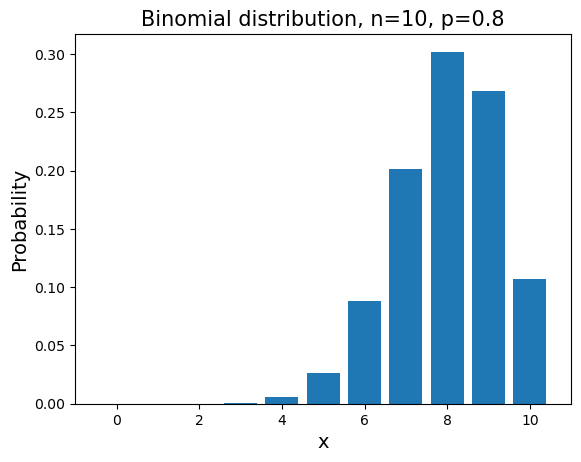

In [12]:
#B(n,p)를 따르는 확률변수 X의 확률질량함수(probability mass function) 그래프
n = 10
p = 0.8

x = np.arange(0, n+1)
binom_vec = binom.pmf(k=x,n=n, p=p)
plt.bar(x, binom_vec)
plt.xlabel('x', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.xlim([-1, n+1])
plt.title("Binomial distribution, n={0}, p={1}".format(n, p), fontsize= 15)
plt.show()


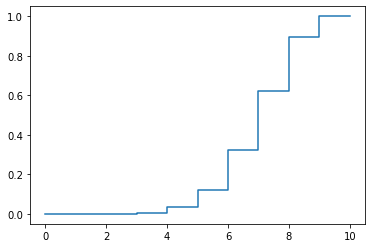

In [23]:
#B(n,p)를 따르는 확률변수 X의 누적확률분포함수(cumulative distribuion function) 그래프
n = 10
p = 0.8
x = np.arange(0, n+1)
binom_cum = binom.cdf(k=x,n=n, p=p)
plt.step(x, binom_cum,  where='pre')
plt.show()

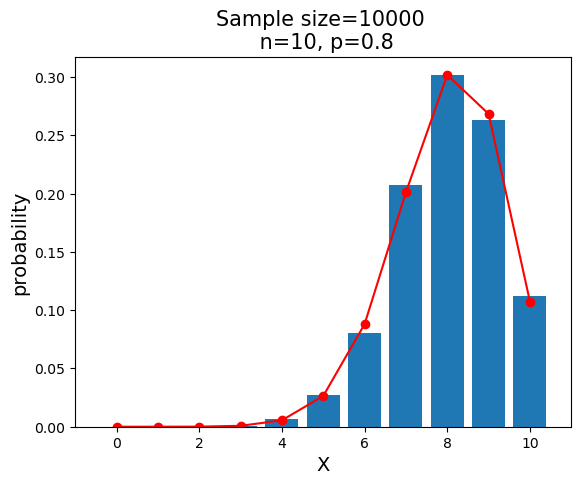

In [3]:
#B(n,p) 를 따르는 랜덤값 생성하고 이를 히스토그램으로 나타내기
n = 10
p = 0.8
size=10000  #생성할 값의 수
x = np.arange(0, n+1)
binom_vec = binom.pmf(k=x,n=n, p=p)
sample=binom.rvs(n=n, p=p, size=size)
values, counts = np.unique(sample, return_counts=True)
probs = counts / counts.sum()

fig,ax=plt.subplots()
ax.bar(values, probs)
#ax=plt.bar(values, probs)
ax.plot(x, binom_vec, marker='o', color='red')
ax.set_title('Sample size={} \n n={}, p={}'.format(size,n,p), fontsize=15)
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('probability', fontsize=14)
ax.set_xlim(-1,n+1)
plt.show()

**문제2-2)** 어떤 씨를 심었을 때 발아할 확률이 0.8이라고 하자. 이 씨를 10개를 심는다고 하고 각 씨가 발아하는 사건은 서로 독립이라고 하자. 이때 10개의 씨 중에 7개의 씨가 발아할 확률은? (Example 2.4.1 변형)

In [10]:
n=10
p=0.8 
x=7
binom.pmf(k=x, n=n, p=p)

0.20132659199999978

**문제2-3)** 닭이 달걀을 낳았을 때 성별이 암컷일 확률을 0.5라고 하자. 닭들이 낳은 달걀을 임의로 10개 골라 부화시켜서 성별을 확인한다고 할 때, 암병아리가 5마리가 이상일 확률을 구하여라. 이때, 부화된 달걀의 성별은 독립적으로 결정된다고 가정한다.(Example 2.4.8 변형)

In [11]:
n=10
p=0.5 
x=4
1-binom.cdf(k=x, n=n, p=p)

0.623046875

## 2) Poisson Distribution <a id="part2"></a>

확률변수 $X$ 가 평균이 $\lambda$인 포아송 분포를 따를 때 그 확률질량함수는 
\begin{equation}
P(X=x)= \frac{{\lambda}^x e^{-\lambda}}{x!} , x=0, 1, 2, ...
\end{equation}

In [4]:
#여기를 먼저 실행
from scipy.stats import poisson

In [5]:
#Poisson(lambda) 를 따르는 확률변수 X에 대해 P(X=x)를 구할 때
mu=3  #lambda
x=5
poisson.pmf(k=x, mu=mu)

0.10081881344492458

In [6]:
#Poisson(lambda) 를 따르는 확률변수 X에 대해 P(X<=x)를 구할 때
mu=3 
x=5
poisson.cdf(k=x, mu=mu)

0.9160820579686966

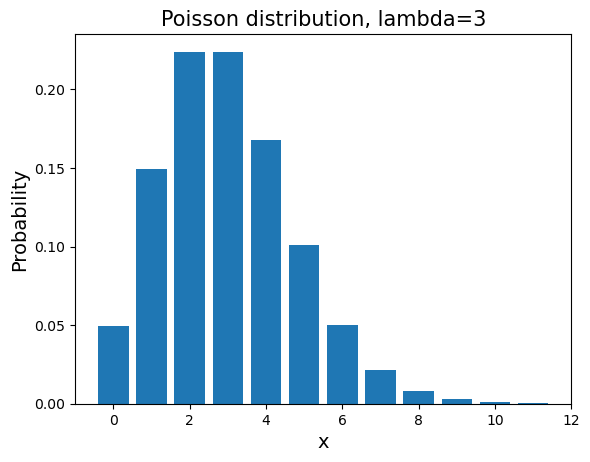

In [7]:
#Poisson(lambda) 를 따르는 확률변수 X의 확률질량함수(probability mass function) 그래프
mu=3 
x=5
x = np.arange(0, 4*mu)
poisson_vec = poisson.pmf(k=x, mu=mu)
plt.bar(x, poisson_vec)
plt.xlabel('x', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.xlim([-1, 4*mu])
plt.title("Poisson distribution, lambda={}".format(mu), fontsize= 15)
plt.show()

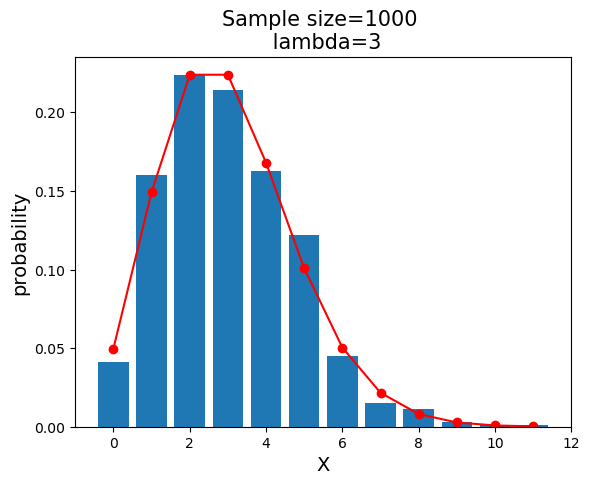

In [9]:
#Poisson(lambda)  를 따르는 랜덤값 생성하고 이를 히스토그램으로 나타내기
mu=3 
size=1000  #생성할 값의 수
x = np.arange(0, mu*4)
poisson_vec = poisson.pmf(k=x,mu=mu)
sample=poisson.rvs(mu=mu, size=size)
values, counts = np.unique(sample, return_counts=True)
probs = counts / counts.sum()

fig,ax=plt.subplots()
ax.bar(values, probs)
#ax=plt.bar(values, probs)
ax.plot(x, poisson_vec, marker='o', color='red')
ax.set_title('Sample size={} \n lambda={}'.format(size, mu), fontsize=15)
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('probability', fontsize=14)
ax.set_xlim(-1,mu*4)
plt.show()

In [10]:
sample

array([ 2,  2,  5,  4,  1,  5,  2,  6,  4,  1,  7,  3,  4,  4,  4, 10,  5,
        3,  3,  4,  5,  2,  2,  0,  3,  2,  5,  4,  7,  4,  3,  6,  0,  6,
        5,  3,  4,  3,  1,  3,  1,  1,  2,  5,  3,  0,  3,  4,  4,  5,  5,
        4,  3,  2,  3,  5,  0,  4,  3,  4,  4,  0,  4,  4,  2,  2,  2,  1,
        1,  2,  3,  4,  3,  5,  3,  4,  4,  1,  1,  4,  3,  5,  1,  3,  4,
        2,  2,  5,  3,  7,  2,  5,  2,  1,  3,  2,  2,  2,  3,  1,  2,  5,
        3,  3,  1,  1,  2,  2,  2,  2,  6,  5,  3,  3,  6,  2,  5,  4,  3,
        6,  2,  5,  5,  5,  1,  3,  2,  3,  3,  4,  3,  6,  3,  2,  1,  1,
        1,  4,  3,  5,  3,  5,  1,  3,  0,  2,  1,  1,  4,  2,  4,  4,  3,
        3,  3,  4,  2,  4,  1,  5,  6,  2,  1,  2,  5,  2,  8,  2,  2,  3,
        4,  1,  2,  1,  2,  2,  2,  0,  3,  5,  5,  3,  1,  2,  3,  4,  5,
        8,  3,  2,  3,  1,  2,  3,  1,  1,  1,  1,  3,  9,  4,  4,  4,  4,
        2,  2,  3,  2,  2,  1,  2,  2,  2,  5,  9,  4,  2,  4,  1,  0,  2,
        3,  1,  2,  3,  1

**문제2-4)** 어떤 도시에서 119 신고 전화가 대략 10분간 6통이 온다고 하자. 10분 동안 5통 이상의 전화가 걸려올 확률은 어떻게 되는가? (Example 2.6.4 변형)

In [8]:
mu=6
x=4
1-poisson.cdf(k=x, mu=mu)

0.7149434996833688

## 3) Hypergeometric Distribution <a id="part3"></a>

확률변수 $X$ 가 Hypergeom($N$, $N_1$, $n$)을 따를 때 그 확률질량함수는 
\begin{equation}
P(X=x)= \frac{{N_1 \choose x} {N_2 \choose n-x}}{{N \choose n}} ,   x=0, 1, 2, ..., min(N_1, n)
\end{equation}

In [11]:
#여기를 먼저 실행
from scipy.stats import hypergeom

In [12]:
#Hypergeom(N, N1, m) 를 따르는 확률변수 X에 대해 P(X=x)를 구할 때
N=20  #항아리의 총 공의 수
n=3   #비복원으로 꺼내는 공의 수
N1=12  #항아리의 공 중 success해당하는 종류의 수

x=2   
hypergeom.pmf(x, N, N1, n)  #P(X=2)

0.4631578947368421

In [13]:
#Hypergeom(N, N1, m) 를 따르는 확률변수 X에 대해 P(X<=x)를 구할 때
N=20  #항아리의 총 공의 수
n=3   #비복원으로 꺼내는 공의 수
N1=12  #항아리의 공 중 success해당하는 종류의 수

x=2   
hypergeom.cdf(x, N, N1, n)

0.8070175438596492

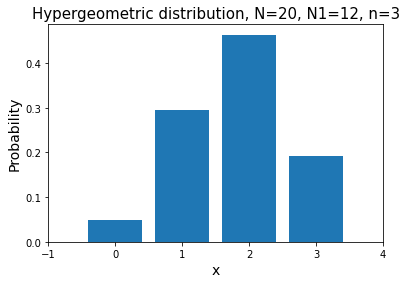

In [9]:
#Hypergeometric(N, N1, m) 를 따르는 확률변수 X의 확률질량함수(probability mass function) 그래프
N=20  #항아리의 총 공의 수
n=3   #비복원으로 꺼내는 공의 수
N1=12  #항아리의 공 중 success해당하는 종류의 수
x = np.arange(0, n+1)
hyper_vec = hypergeom.pmf(x, N, N1, n)
plt.bar(x,hyper_vec)
plt.xlabel('x', fontsize=14)
plt.ylabel('Probability', fontsize=14)
plt.xlim([-1, n+1])
plt.title("Hypergeometric distribution, N={}, N1={}, n={}".format(N,N1,n), fontsize= 15)
plt.show()

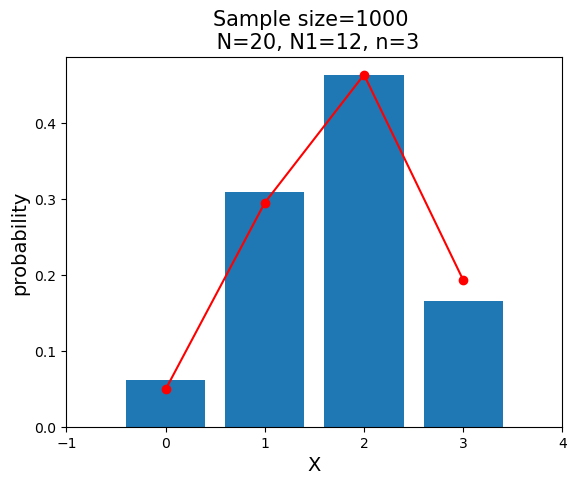

In [15]:
#Hypergeometric((N, N1, m)  를 따르는 랜덤값 생성하고 이를 히스토그램으로 나타내기
N=20  #항아리의 총 공의 수
n=3   #비복원으로 꺼내는 공의 수
N1=12  #항아리의 공 중 success해당하는 종류의 수
size=1000
x = np.arange(0, n+1)
hyper_vec = hypergeom.pmf(x, N, N1, n)
sample=hypergeom.rvs(N, N1, n, size=size)
values, counts = np.unique(sample, return_counts=True)
probs = counts / counts.sum()

fig,ax=plt.subplots()
ax.bar(values, probs)
#ax=plt.bar(values, probs)
ax.plot(x, hyper_vec, marker='o', color='red')
ax.set_title('Sample size={} \n N={}, N1={}, n={}'.format(size,N,N1,n), fontsize=15)
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('probability', fontsize=14)
ax.set_xlim(-1,n+1)
plt.show()

In [16]:
sample

array([1, 3, 2, 2, 2, 1, 1, 3, 1, 1, 1, 2, 2, 3, 0, 2, 1, 2, 3, 3, 3, 3,
       2, 1, 0, 3, 2, 1, 1, 0, 2, 1, 2, 1, 0, 0, 3, 2, 2, 2, 1, 2, 1, 3,
       2, 1, 2, 2, 3, 2, 3, 1, 1, 3, 2, 1, 2, 1, 1, 2, 1, 0, 3, 2, 2, 3,
       1, 2, 2, 1, 3, 3, 3, 1, 2, 2, 1, 2, 1, 1, 2, 3, 3, 2, 2, 3, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 3, 2, 2, 3, 2, 2, 3, 3,
       1, 2, 1, 2, 1, 2, 2, 2, 2, 3, 1, 3, 2, 1, 2, 1, 3, 1, 3, 3, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 3, 2, 2, 2, 3, 2, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 3, 0, 1, 1, 3, 2, 2, 1, 1, 2, 2, 1, 1, 3, 1, 3, 3, 1,
       2, 0, 2, 0, 0, 1, 2, 1, 2, 3, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 1,
       3, 2, 1, 1, 2, 2, 1, 2, 2, 3, 1, 2, 1, 1, 3, 1, 2, 2, 0, 1, 1, 0,
       1, 2, 2, 2, 1, 3, 1, 0, 1, 3, 2, 1, 2, 1, 2, 2, 3, 2, 2, 1, 2, 2,
       2, 3, 2, 2, 2, 2, 3, 1, 1, 2, 2, 3, 1, 2, 3, 2, 0, 2, 3, 1, 2, 2,
       0, 2, 2, 2, 1, 3, 1, 2, 3, 0, 3, 1, 1, 1, 2, 1, 1, 2, 2, 3, 3, 3,
       1, 2, 0, 2, 3, 1, 2, 2, 0, 2, 1, 2, 2, 0, 1,

**문제2-5)** 연못 속에 물고기가 50마리 살고 있다. 그 중 10마리는 표시가 되어 있다. 연못에서 물고기를 7마리 낚았다고 할 때 (잡은 물고기는 풀어주지 않음), 7마리 중에서 표시된 물고기가 두 마리 발견될 확률은 얼마인가?(Example 2.1.5)


In [14]:
N=50  #항아리의 총 공의 수
n=7   #비복원으로 꺼내는 공의 수
N1=10  #항아리의 공 중 success해당하는 종류의 수

x=2   
hypergeom.pmf(x, N, N1, n)  #P(X=2)

0.29644629191345195

## 4) Uniform Distribution <a id="part4"></a>

In [18]:
#여기를 먼저 실행
from scipy.stats import uniform

In [20]:
#U(a, b) 를 따르는 확률변수 X에 대해 pdf 값을 구할 때
a=1
b=3
x=2
uniform.pdf(x, a, b-a)    # loc=a, scale=b-a

0.5

In [21]:
#U(a, b) 를 따르는 확률변수 X에 대해 cdf 값 F(x)=P(X<=x)를 구할 때
a=1
b=3
x=2
uniform.cdf(x, a, b-a)    # loc=a, scale=b-a

0.5

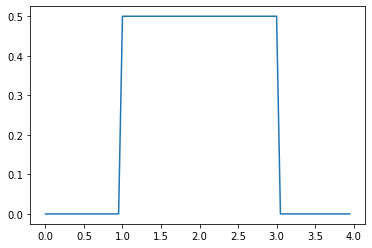

In [24]:
#U(a, b) 를 따르는 확률변수 X에 대해 pdf 의 그래프
a=1
b=3

x = np.arange(a-1, b+1, 0.05) 
y = uniform.pdf(x, a, b-a)
   
plt.plot(x, y) 
plt.show()

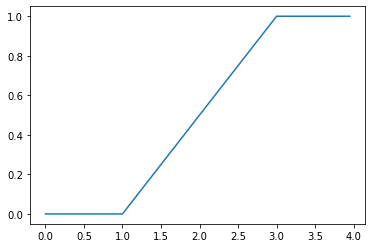

In [26]:
#U(a, b) 를 따르는 확률변수 X에 대해 cdf 의 그래프
a=1
b=3

x = np.arange(a-1, b+1, 0.05) 
y = uniform.cdf(x, a, b-a)
   
plt.plot(x, y) 
plt.show()

Text(0, 0.5, 'Probability density')

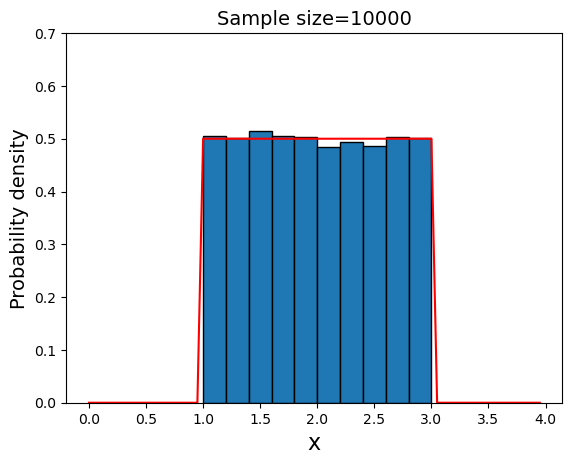

In [21]:
#U(a, b)  를 따르는 랜덤값 생성하고 이를 히스토그램으로 나타내기
a=1
b=3
size=10000

x = np.arange(a-1, b+1, 0.05) 
y = uniform.pdf(x, a, b-a)

sample = uniform.rvs(a, b-a, size=size)

fig,ax=plt.subplots()


ax.hist(sample, density=True, edgecolor='black')
ax.set_xlabel('x', fontsize=16)
ax.plot(x, y, color='red', label="Uniform distribution")
ax.set_ylim([0, max(y)+0.2])
ax.set_title("Sample size={}".format(size), fontsize=14)
ax.set_ylabel('Probability density', fontsize=14)

In [20]:
sample

array([1.16654662, 2.66522023, 1.93144831, 2.00805796, 1.16700706,
       1.19341734, 2.81170743, 2.70077069, 1.61428294, 1.13856086,
       1.80551281, 2.73464457, 1.85019036, 2.80698988, 2.04084257,
       2.32454076, 2.00680979, 1.16122624, 1.67483883, 1.20121124,
       2.93440304, 1.98823053, 2.43544547, 1.03053046, 1.05001459,
       1.7512855 , 2.87430958, 1.31967396, 1.62856081, 1.03443681,
       2.2769959 , 2.43610996, 1.02983718, 1.5402343 , 1.82307188,
       2.53481638, 2.33682654, 2.49887054, 1.8847334 , 2.36410484,
       1.71035003, 1.28455684, 1.93258435, 2.45915197, 1.27418201,
       1.859689  , 2.43545593, 1.98088533, 2.27771795, 1.96813073,
       1.94621612, 2.97197795, 2.37746198, 2.11015576, 2.90506124,
       1.36875938, 2.4864265 , 1.767767  , 1.74357669, 1.75659448,
       1.63096745, 2.99572435, 1.78412159, 1.95607472, 1.71153219,
       1.76346001, 1.97469686, 2.54630047, 2.44981305, 1.39710782,
       2.10774383, 2.75224673, 2.72317431, 2.78687117, 1.34332

## 5) Normal Distribution <a id="part5"></a>

In [22]:
#여기를 먼저 실행
from scipy.stats import norm

In [36]:
#N(m, s) 를 따르는 확률변수 X에 대해 pdf 값을 구할 때
m=1
s=2

x=2
norm.pdf(x, m, s)    # loc=m, scale=s

0.17603266338214976

In [37]:
#N(m, s) 를 따르는 확률변수 X에 대해 cdf 값을 구할 때
m=1
s=2

x=2
norm.cdf(x, m, s)    # loc=m, scale=s

0.6914624612740131

In [26]:
#N(0, 1) 를 따르는 확률변수 Z에 대해 percent point 값을 구할 때
m=0
s=1
p=0.1 

norm.ppf(1-p, m, s)    # loc=m, scale=s upper percent point

1.2815515655446004

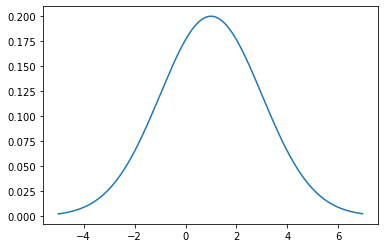

In [38]:
#N(m, s)  를 따르는 확률변수 X에 대해 pdf 의 그래프
m=1
s=2

x = np.arange(m-3*s, m+3*s, 0.05) 
y = norm.pdf(x, m, s)
   
plt.plot(x, y) 
plt.show()

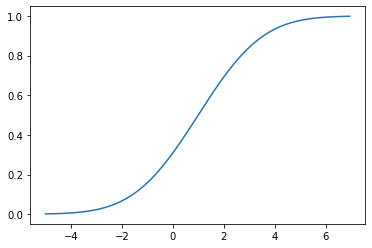

In [39]:
#N(m, s)  를 따르는 확률변수 X에 대해 cdf 의 그래프
m=1
s=2

x = np.arange(m-3*s, m+3*s, 0.05) 
y = norm.cdf(x, m, s)
   
plt.plot(x, y) 
plt.show()

Text(0, 0.5, 'Probability density')

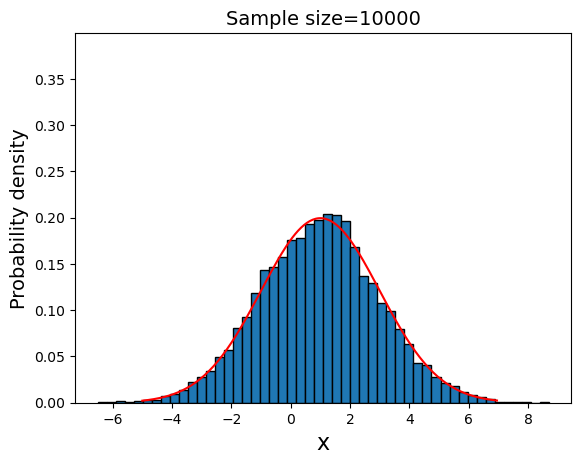

In [27]:
#N(m, s) 를 따르는 랜덤값 생성하고 이를 히스토그램으로 나타내기
m=1
s=2

size=10000

x = np.arange(m-3*s, m+3*s, 0.05) 
y = norm.pdf(x, m, s)

sample = norm.rvs(m, s, size=size)

fig,ax=plt.subplots()


ax.hist(sample, density=True, edgecolor='black', bins=50)
ax.set_xlabel('x', fontsize=16)
ax.plot(x, y, color='red', label="Normal distribution")
ax.set_ylim([0, max(y)+0.2])
ax.set_title("Sample size={}".format(size), fontsize=14)
ax.set_ylabel('Probability density', fontsize=14)

**문제 3-3)** 다음 확률을 구하여라. 

- 𝑍 가 표준정규분포를 따를 때  𝑃(0.53<𝑍<2.06) 
- 𝑋 가 평균이 6이고 분산이 25인 정규분포를 따를 때, 𝑃(0<𝑋≤8)
- 𝑋 가 평균이 6이고 분산이 25인 정규분포를 따를 때, 𝑃(𝑋>21)

In [23]:
m=0
s=1


norm.cdf(2.06, m, s) -norm.cdf(0.53, m, s)    # loc=m, scale=s

0.27835669498549953

In [24]:
m=6
s=5

norm.cdf(8, m, s) -norm.cdf(0, m, s)    # loc=m, scale=s

0.540352071388616

In [25]:
m=6
s=5

1-norm.cdf(21, m, s) 

0.0013498980316301035

**문제 3-4)** 다음 값을 구하여라.
- $𝑧_{0.1}$= 
